In [203]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [204]:
df = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")

In [205]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [207]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [208]:
df['price_range'].unique()

array([1, 2, 3, 0])

In [209]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [210]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'salary' column
df['battery_power'] = scaler.fit_transform(df[['battery_power']])
df['mobile_wt'] = scaler.fit_transform(df[['mobile_wt']])
df['int_memory'] = scaler.fit_transform(df[['int_memory']])
df['fc'] = scaler.fit_transform(df[['fc']])
df['n_cores'] = scaler.fit_transform(df[['n_cores']])
df['pc'] = scaler.fit_transform(df[['pc']])
df['px_height'] = scaler.fit_transform(df[['px_height']])
df['px_width'] = scaler.fit_transform(df[['px_width']])
df['ram'] = scaler.fit_transform(df[['ram']])
df['sc_h'] = scaler.fit_transform(df[['sc_h']])
df['sc_w'] = scaler.fit_transform(df[['sc_w']])
df['talk_time'] = scaler.fit_transform(df[['talk_time']])
df['clock_speed'] = scaler.fit_transform(df[['clock_speed']])
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0,0.68,0,0.052632,0,0.080645,0.6,0.900000,0.142857,...,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0,0,1,1
1,0.347361,1,0.00,1,0.000000,1,0.822581,0.7,0.466667,0.285714,...,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1,1,0,2
2,0.041416,1,0.00,1,0.105263,1,0.629032,0.9,0.541667,0.571429,...,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1,1,0,2
3,0.076152,1,0.80,0,0.000000,0,0.129032,0.8,0.425000,0.714286,...,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1,0,0,2
4,0.881764,1,0.28,0,0.684211,1,0.677419,0.6,0.508333,0.142857,...,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1,1,0,1


In [211]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,0.492664,0.293533,0.0,0.234302,0.484302,0.744322,1.0
blue,2000.0,0.495000,0.500100,0.0,0.000000,0.000000,1.000000,1.0
clock_speed,2000.0,0.408900,0.326402,0.0,0.080000,0.400000,0.680000,1.0
dual_sim,2000.0,0.509500,0.500035,0.0,0.000000,1.000000,1.000000,1.0
fc,2000.0,0.226816,0.228497,0.0,0.052632,0.157895,0.368421,1.0
four_g,2000.0,0.521500,0.499662,0.0,0.000000,1.000000,1.000000,1.0
int_memory,2000.0,0.484621,0.292673,0.0,0.225806,0.483871,0.741935,1.0
m_dep,2000.0,0.501750,0.288416,0.1,0.200000,0.500000,0.800000,1.0
mobile_wt,2000.0,0.502075,0.294997,0.0,0.241667,0.508333,0.750000,1.0
n_cores,2000.0,0.502929,0.326834,0.0,0.285714,0.428571,0.857143,1.0


# One hot encoded model

In [212]:
df_one_hot_encoded = pd.get_dummies(df,columns=['price_range'])

In [213]:
df_one_hot_encoded.price_range_0 = df_one_hot_encoded.price_range_0.astype(int)
df_one_hot_encoded.price_range_1 = df_one_hot_encoded.price_range_1.astype(int)
df_one_hot_encoded.price_range_2 = df_one_hot_encoded.price_range_2.astype(int)
df_one_hot_encoded.price_range_3 = df_one_hot_encoded.price_range_3.astype(int)

In [214]:
df_one_hot_encoded.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range_0,price_range_1,price_range_2,price_range_3
0,0.227789,0,0.68,0,0.052632,0,0.080645,0.6,0.900000,0.142857,...,0.285714,0.388889,0.944444,0,0,1,0,1,0,0
1,0.347361,1,0.00,1,0.000000,1,0.822581,0.7,0.466667,0.285714,...,0.857143,0.166667,0.277778,1,1,0,0,0,1,0
2,0.041416,1,0.00,1,0.105263,1,0.629032,0.9,0.541667,0.571429,...,0.428571,0.111111,0.388889,1,1,0,0,0,1,0
3,0.076152,1,0.80,0,0.000000,0,0.129032,0.8,0.425000,0.714286,...,0.785714,0.444444,0.500000,1,0,0,0,0,1,0
4,0.881764,1,0.28,0,0.684211,1,0.677419,0.6,0.508333,0.142857,...,0.214286,0.111111,0.722222,1,1,0,0,1,0,0


In [215]:
X = df_one_hot_encoded.drop(columns=["price_range_0","price_range_1","price_range_2","price_range_3"])
y = df_one_hot_encoded[["price_range_0","price_range_1","price_range_2","price_range_3"]]

In [216]:
y.head()

,price_range_0,price_range_1,price_range_2,price_range_3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


In [217]:
X.shape,y.shape

((2000, 20), (2000, 4))

In [218]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [219]:
X_train.shape,X_test.shape,y_test.shape,y_test.shape

((1600, 20), (400, 20), (400, 4), (400, 4))

In [220]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(4,activation="softmax"),
])

In [221]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.categorical_crossentropy,
    metrics = ["accuracy"]
)

In [222]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
checkpoint_callback = ModelCheckpoint(filepath='model_best.keras', monitor='val_accuracy', save_best_only=True)

In [223]:
history = model.fit(X_train,y_train,
                    epochs=50,
                   callbacks=[early_stopping_callback, checkpoint_callback])

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3148 - loss: 1.3570
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7402 - loss: 0.6851
Epoch 3/50
 1/50 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8438 - loss: 0.4413

/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8502 - loss: 0.3735
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8288 - loss: 0.4059
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9229 - loss: 0.2249
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8917 - loss: 0.2516
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9052 - loss: 0.2244
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8976 - loss: 0.2093
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9490 - loss: 0.1449
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9409 - loss: 0.1316
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9607 - loss: 0.1070
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9645 - loss: 0.1021
Epoch 13/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9662 - loss: 0.0960
Epoch 14/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9742 - loss: 0.074

In [224]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_77 (Dense)                │ (32, 256)              │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (32, 128)              │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (32, 64)               │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (32, 32)               │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (32, 32)               │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (32, 4)                │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 149,390 (583.56 KB)

 Trainable params: 49,796 (194.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 99,594 (389.04 KB)

<Axes: >

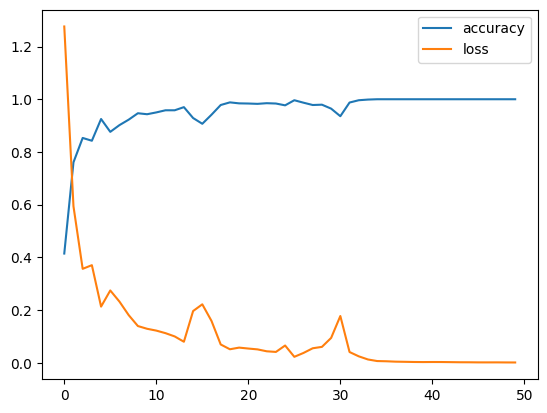

In [225]:
pd.DataFrame(history.history).plot()

In [226]:
loss,accuracy = model.evaluate(X_test,y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9286 - loss: 0.2326  
Model loss on the test set: 0.2564581632614136
Model accuracy on the test set: 92.75%


# Label encoded Model

In [227]:
X = df.drop(columns=["price_range"])
y = df["price_range"]

In [228]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0,0.68,0,0.052632,0,0.080645,0.6,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0,0,1
1,0.347361,1,0.00,1,0.000000,1,0.822581,0.7,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1,1,0
2,0.041416,1,0.00,1,0.105263,1,0.629032,0.9,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1,1,0
3,0.076152,1,0.80,0,0.000000,0,0.129032,0.8,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1,0,0
4,0.881764,1,0.28,0,0.684211,1,0.677419,0.6,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1,1,0


In [240]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [241]:
y.unique()

array([1, 2, 3, 0])

In [242]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [243]:
X_train.shape,X_test.shape,y_test.shape,y_test.shape

((1600, 20), (400, 20), (400,), (400,))

In [244]:
model_label = tf.keras.Sequential([
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(4,activation="softmax"),
])

In [245]:
model_label.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics = ["accuracy"]
)

In [246]:
history = model_label.fit(X_train,y_train,
                    epochs=50,
                   callbacks=[early_stopping_callback, checkpoint_callback])

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3510 - loss: 1.3345
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6966 - loss: 0.7250
Epoch 3/50
 1/50 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8125 - loss: 0.5143

/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8540 - loss: 0.4235
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8866 - loss: 0.2915
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8009 - loss: 0.4248
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9272 - loss: 0.2010
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9257 - loss: 0.1767
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9287 - loss: 0.1799
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9373 - loss: 0.1511
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9205 - loss: 0.1719
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9517 - loss: 0.1281
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9348 - loss: 0.1456
Epoch 13/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: 0.1136
Epoch 14/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9536 - loss: 0.114

<Axes: >

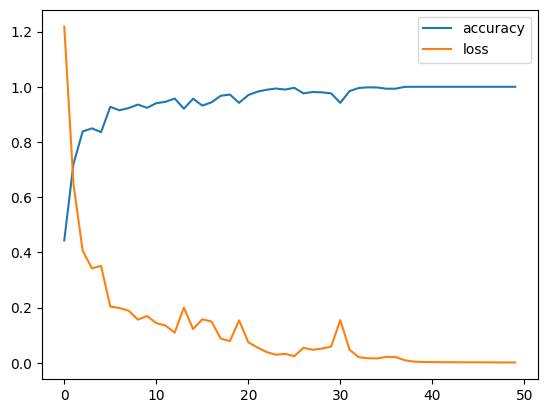

In [247]:
pd.DataFrame(history.history).plot()

In [249]:
loss,accuracy = model.evaluate(X_test,y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9191 - loss: 0.3418 
Model loss on the test set: 0.36798161268234253
Model accuracy on the test set: 91.50%
